In [81]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import fcluster

data = pd.read_excel('Задача.xlsx')

In [82]:
data.head()

,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,6-LLJEH,20,1,263,716693
1,2-GLHFG,74,51,107,274393
2,6-FJFKL,27,1,165,723841
3,4-KJEJL,24,6,348,139419
4,5-JFFGH,26,3,286,650003


In [83]:
data.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
count,484.000000,484.000000,484.000000,4.840000e+02
mean,45.320248,21.417355,227.074380,1.017901e+06
std,19.632512,18.037096,171.561271,1.187545e+06
min,20.000000,1.000000,20.000000,1.201850e+05
25%,26.000000,5.000000,103.000000,1.949980e+05
50%,39.500000,15.000000,173.000000,4.410280e+05
75%,65.000000,38.000000,299.250000,1.109668e+06
max,79.000000,58.000000,700.000000,3.982828e+06


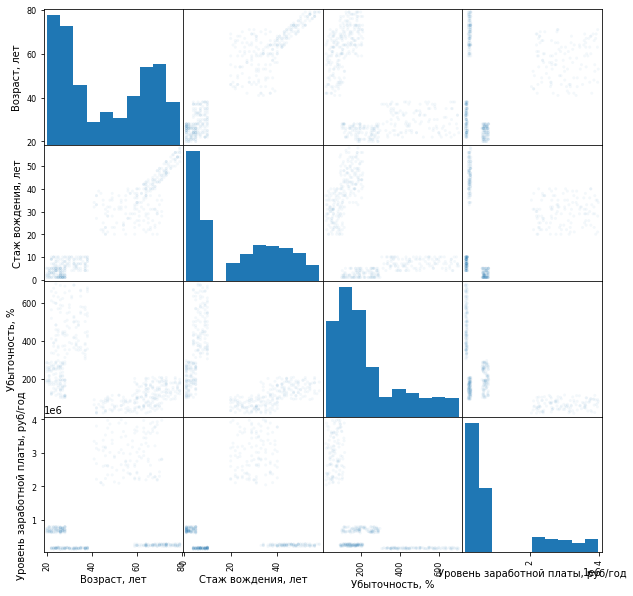

In [84]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [85]:
data.corr()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
"Возраст, лет",1.000000,0.944395,-0.535885,0.255785
"Стаж вождения, лет",0.944395,1.000000,-0.516287,0.190904
"Убыточность, %",-0.535885,-0.516287,1.000000,-0.583522
"Уровень заработной платы, руб/год",0.255785,0.190904,-0.583522,1.000000


In [86]:
data_for_clust=data.drop(data.columns[0], axis=1).values

In [88]:
dataNorm = preprocessing.scale(data_for_clust)

In [89]:
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')

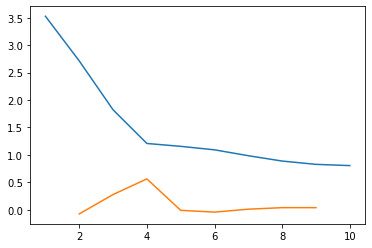

clusters: 4


In [95]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)

In [123]:
km = KMeans(k).fit(dataNorm)

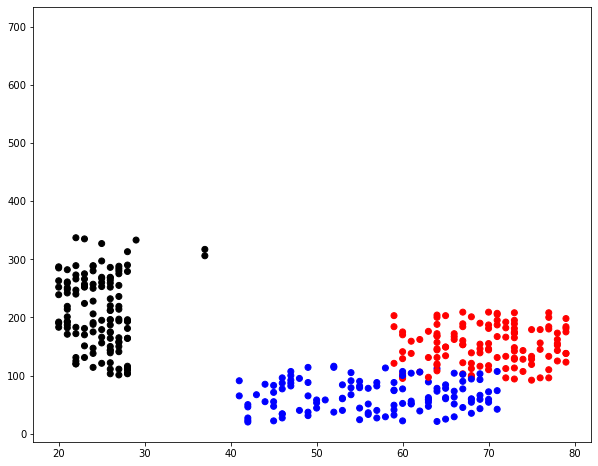

In [127]:
plt.figure(figsize=(10, 8))
plt.scatter(data_for_clust[:,0], data_for_clust[:,2], c=km.labels_, cmap='flag')
plt.show()

In [100]:
k=4
clusters=fcluster(data_linkage, k, criterion='maxclust')
dataK=data
dataK['group_no']=clusters
writer = pd.ExcelWriter('result.xlsx')
dataK.to_excel(writer,'KMeans')
writer.save()

In [137]:
data_clust4 = pd.read_excel('cluster4.xlsx')
data_clust4.drop(data_clust4.columns[[0,1,6]],axis=1,inplace=True)

In [138]:
data_clust4.head()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,47,32,107,2596468
1,65,33,78,2810439
2,49,36,37,3373315
3,64,28,21,2188539
4,42,37,46,2673344


In [139]:
data_clust4.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
count,121.000000,121.000000,121.000000,1.210000e+02
mean,56.818182,29.933884,65.752066,2.978736e+06
std,8.721621,5.832003,25.988549,5.723718e+05
min,41.000000,20.000000,20.000000,2.040290e+06
25%,49.000000,25.000000,45.000000,2.475804e+06
50%,57.000000,30.000000,62.000000,2.911694e+06
75%,64.000000,35.000000,87.000000,3.494387e+06
max,71.000000,40.000000,116.000000,3.982828e+06


In [141]:
data_clust1 = pd.read_excel('cluster1.xlsx')
data_clust1.drop(data_clust1.columns[[0,1,6]],axis=1,inplace=True)

In [142]:
data_clust1.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
count,121.000000,121.000000,121.000000,121.000000
mean,24.504132,2.586777,203.024793,700447.280992
std,2.536809,1.492590,57.666059,57143.673294
min,20.000000,1.000000,101.000000,602584.000000
25%,22.000000,1.000000,158.000000,649111.000000
50%,25.000000,2.000000,196.000000,692754.000000
75%,27.000000,4.000000,257.000000,747401.000000
max,28.000000,5.000000,297.000000,799461.000000


In [143]:
data_clust2 = pd.read_excel('cluster2.xlsx')
data_clust2.drop(data_clust2.columns[[0,1,6]],axis=1,inplace=True)

In [144]:
data_clust2.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
count,121.000000,121.000000,121.000000,121.000000
mean,30.107438,7.322314,487.140496,149461.619835
std,5.115013,2.021612,112.865651,17327.340695
min,22.000000,4.000000,306.000000,120185.000000
25%,25.000000,6.000000,387.000000,136331.000000
50%,30.000000,7.000000,471.000000,148751.000000
75%,35.000000,9.000000,578.000000,163239.000000
max,38.000000,10.000000,700.000000,179863.000000


In [145]:
data_clust3 = pd.read_excel('cluster3.xlsx')
data_clust3.drop(data_clust3.columns[[0,1,6]],axis=1,inplace=True)

In [146]:
data_clust3.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
count,121.00000,121.000000,121.000000,121.000000
mean,69.85124,45.826446,152.380165,242958.446281
std,5.68721,6.113752,32.875334,24325.309127
min,59.00000,33.000000,92.000000,200043.000000
25%,65.00000,42.000000,128.000000,220775.000000
50%,70.00000,46.000000,153.000000,243203.000000
75%,74.00000,50.000000,180.000000,267884.000000
max,79.00000,58.000000,209.000000,279472.000000
